<a href="https://colab.research.google.com/github/satishgc227/Derby-project/blob/main/Kmeans%2CPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# Load in the data
df = pd.read_csv('/content/edited complete.csv',encoding='latin',nrows=500000)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
df['race_type\xa0'].unique()
df['course_type'].unique()
df['track_condition\xa0'].unique()
df['track_id'].unique()

s=df[['race_type\xa0','course_type','track_condition\xa0','track_id']]

In [3]:
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(df[['race_type\xa0','course_type','track_condition\xa0','track_id']]).toarray()

In [4]:
feature_labels=ohe.categories_
print(feature_labels)

[array(['ALW', 'AOC', 'CLM', 'MCL', 'MSW', 'SHP', 'SOC', 'SST', 'STK',
       'STR', 'WCL', 'WMC'], dtype=object), array(['D', 'I', 'M', 'O', 'T'], dtype=object), array(['FM ', 'FT ', 'GD ', 'MY ', 'SF ', 'SY ', 'YL '], dtype=object), array(['AQU', 'BEL', 'SAR'], dtype=object)]


In [5]:
np.hstack(feature_labels)

array(['ALW', 'AOC', 'CLM', 'MCL', 'MSW', 'SHP', 'SOC', 'SST', 'STK',
       'STR', 'WCL', 'WMC', 'D', 'I', 'M', 'O', 'T', 'FM ', 'FT ', 'GD ',
       'MY ', 'SF ', 'SY ', 'YL ', 'AQU', 'BEL', 'SAR'], dtype=object)

In [6]:
feature_labels=np.hstack(feature_labels)
f=pd.DataFrame(feature_array,columns=feature_labels)
pd.concat([df,f],axis=1)

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,FM,FT,GD,MY,SF,SY,YL,AQU,BEL,SAR
0,AQU,01-01-2019,9,6,73,40.672946,-73.827587,600,D,GD,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,AQU,01-01-2019,9,6,74,40.672990,-73.827568,600,D,GD,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,AQU,01-01-2019,9,6,63,40.672510,-73.827781,600,D,GD,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,AQU,01-01-2019,9,6,64,40.672553,-73.827762,600,D,GD,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,AQU,01-01-2019,9,6,65,40.672596,-73.827742,600,D,GD,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,AQU,26-01-2019,8,5,66,40.669664,-73.831994,900,D,FT,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
499996,AQU,26-01-2019,8,5,55,40.670085,-73.832254,900,D,FT,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
499997,AQU,26-01-2019,8,5,56,40.670044,-73.832238,900,D,FT,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
499998,AQU,26-01-2019,8,5,57,40.670002,-73.832221,900,D,FT,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
df.drop(['race_date','track_id','course_type','track_condition\xa0','race_type\xa0','jockey\xa0','program_number\xa0'],axis=1,inplace=True)
df=pd.concat([df,f],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.882258,-0.576745,1.455558,-0.965997,-0.769661,0.896154,0.731941,-0.040947,1.479598,1.257772,0.171578,0.362751,0.125127,0.088074,0.235289
1,-1.881300,-0.575282,1.455370,-0.966467,-0.768259,0.896305,0.731691,-0.040684,1.479861,1.258013,0.171100,0.362763,0.126976,0.088944,0.234444
2,-1.891838,-0.591374,1.457442,-0.961296,-0.783683,0.894644,0.734438,-0.043578,1.476968,1.255358,0.176360,0.362632,0.106648,0.079370,0.243733
3,-1.890879,-0.589911,1.457253,-0.961766,-0.782280,0.894795,0.734189,-0.043315,1.477230,1.255599,0.175882,0.362644,0.108495,0.080241,0.242888
4,-1.889921,-0.588449,1.457064,-0.962236,-0.780878,0.894946,0.733939,-0.043052,1.477494,1.255841,0.175403,0.362656,0.110343,0.081111,0.242044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,-1.175426,0.679960,0.847589,1.674885,1.877624,-0.511781,-1.358947,0.232321,0.461143,0.033219,0.645228,0.034849,-0.442552,-0.199853,0.368987
499996,-1.186044,0.664304,0.850033,1.680258,1.861735,-0.513592,-1.356345,0.229422,0.458354,0.030514,0.650520,0.034767,-0.462785,-0.209486,0.378327
499997,-1.185128,0.665763,0.849876,1.679756,1.863175,-0.513450,-1.356605,0.229681,0.458612,0.030756,0.650045,0.034780,-0.460933,-0.208617,0.377483
499998,-1.184200,0.667213,0.849703,1.679258,1.864616,-0.513302,-1.356858,0.229941,0.458869,0.031000,0.649569,0.034792,-0.459084,-0.207746,0.376638


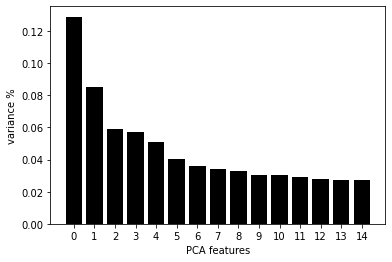

In [45]:
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
PCA_components

Text(0, 0.5, 'PCA 2')

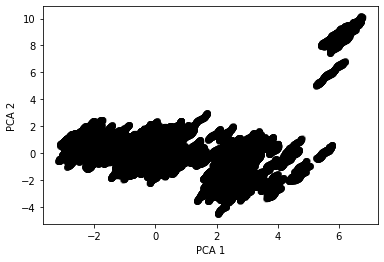

In [9]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [10]:
pca.explained_variance_

array([4.89955673, 3.24390701, 2.25105133, 2.16711714, 1.9274667 ,
       1.53687242, 1.37389155, 1.30355663, 1.24428729, 1.16277551,
       1.1500739 , 1.1075382 , 1.07314022, 1.02951174, 1.02595312])

In [11]:
pca.explained_variance_ratio_

array([0.12893545, 0.0853658 , 0.05923807, 0.05702928, 0.05072271,
       0.04044393, 0.03615497, 0.03430405, 0.03274434, 0.03059929,
       0.03026504, 0.02914568, 0.02824048, 0.02709236, 0.02699871])

explained_variance plot

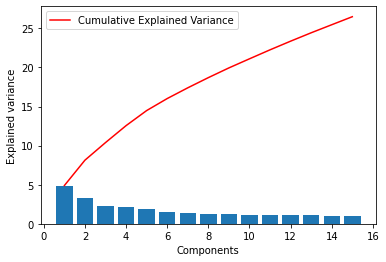

In [12]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

explained_variance_ratio_ plot

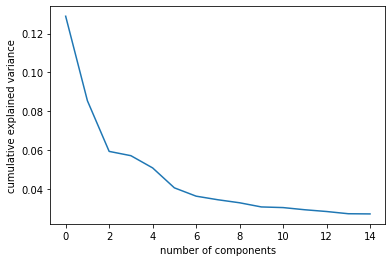

In [13]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#PCA1 is at 0 in xscale

Scree plot
Scree plot is nothing but plot of eigen values(explained_variance_) for each of the components.

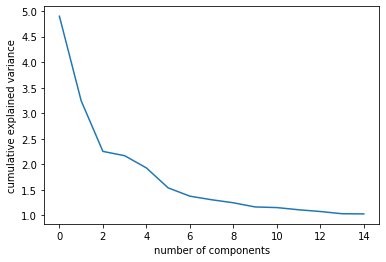

In [14]:
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

It can be seen from plots that, PCA-1 explains most of the variance than subsequent components. In other words, most of the features are explained and encompassed by PCA1

Text(0, 0.5, 'PCA 2')

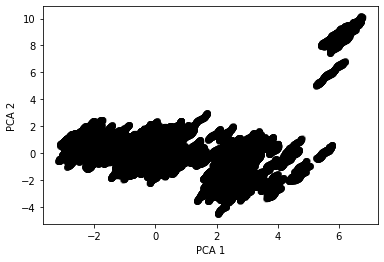

In [15]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Effect of variables on each components
components_ attribute provides principal axes in feature space, representing the directions of maximum variance in the data. This means, we can see influence on each of the components by features.

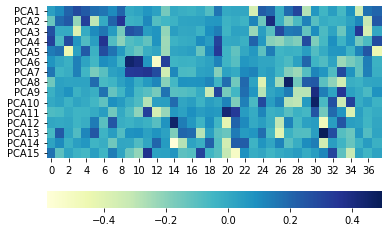

In [47]:
import seaborn as sns
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 #xticklabels=list(x.columns),
                 cbar_kws={"orientation": "horizontal"})


In [51]:
#def myplot(score,coeff,labels=None):
 #   xs = score[:,0]
  #  ys = score[:,1]
   # n = coeff.shape[0]
    #scalex = 1.0/(xs.max() - xs.min())
#    scaley = 1.0/(ys.max() - ys.min())
 #   plt.scatter(xs * scalex,ys * scaley,s=5)
  #  for i in range(n):
   #     plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
    #    if labels is None:
     #       plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
      #  else:
       #     plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    #plt.xlabel("PC{}".format(1))
    #plt.ylabel("PC{}".format(2))
    #plt.grid()

#myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]))
#plt.show()

In [17]:
km=KMeans()

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    
    km.fit_predict(df)
    wcss.append(km.inertia_)
    print('For', i,'Cluster,', np.around(km.inertia_,2),'is the WCSS.')

For 1 Cluster, 5385928106188553.0 is the WCSS.
For 2 Cluster, 1407728907671940.2 is the WCSS.
For 3 Cluster, 650231449345153.4 is the WCSS.
For 4 Cluster, 385657300828528.5 is the WCSS.
For 5 Cluster, 236630806390083.72 is the WCSS.
For 6 Cluster, 178839226462064.3 is the WCSS.
For 7 Cluster, 126999485161894.28 is the WCSS.
For 8 Cluster, 93735896150446.14 is the WCSS.
For 9 Cluster, 74411636452371.06 is the WCSS.
For 10 Cluster, 56548183464613.88 is the WCSS.


In [18]:
import plotly.express as px
fig = px.line(x = range(1,11),
              y=wcss, 
              template='simple_white',
              title = 'Elbow Plot', markers=True,
             color_discrete_sequence=["skyblue"])

fig.update_layout(xaxis_title="Clusters",yaxis_title=" WCSS")


fig.show()

In [49]:
km = KMeans(n_clusters=6)
y_means = km.fit_predict(df)
y_means

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [50]:
df['Target'] = y_means
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
y.shape

(500000,)